# LABMARCS Visualisation
## Libraries

In [1]:
library(ggplot2)
library(hrbrthemes)
library(tidyverse)
library(plotly)
library(BBmisc)
library(scales)
library(dplyr)
library(naniar)
library(gridExtra)
library(knitr)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


ERROR: Error in library(hrbrthemes): there is no package called 'hrbrthemes'


In [3]:
setwd('..')

## Load in data files
### Outcome data
#### NBT Outcomes

In [190]:
NBT_outcomes <- read.csv(file("NBT_outcomes.csv"))
NBT_outcomes = NBT_outcomes %>% 
  rename(
    admissionDate = admission_date,
  )
NBT_outcomes$admissionDate = as.Date(NBT_outcomes$admissionDate, format="%d/%m/%Y")
NBT_outcomes = NBT_outcomes %>% 
  rename(
    dischargeDate = discharge_date,
  )
NBT_outcomes$dischargeDate = as.Date(NBT_outcomes$dischargeDate, format="%d/%m/%Y")
NBT_outcomes_deaths = NBT_outcomes %>%
  filter(DischargeOutcomeDesc == "Patient Died")
NBT_outcomes_deaths$deathDate = NBT_outcomes_deaths$dischargeDate
NBT_outcomes <- merge(NBT_outcomes,NBT_outcomes_deaths,all=TRUE)
NBT_outcomes$ITU_Start = as.Date(NBT_outcomes$ITU_Start, format="%d/%m/%Y")
NBT_outcomes$ITU_End = as.Date(NBT_outcomes$ITU_End, format="%d/%m/%Y")
NBT_outcomes2 = NBT_outcomes %>% select(ID,admissionDate,dischargeDate,ITU_Start,ITU_End,deathDate)

#### UHB Outcomes

In [191]:
UHB_outcomes1 <- read.csv(file("UHB_outcomes1.csv"))
UHB_outcomes1 = UHB_outcomes1 %>% 
  rename(
    admissionDate = attend_date,
  )
UHB_outcomes1$admissionDate = as.Date(UHB_outcomes1$admissionDate, format="%d/%m/%Y")
UHB_outcomes1$dischargeDate = as.Date(UHB_outcomes1$admissionDate + as.integer(UHB_outcomes1$hospital_length_of_stay))
UHB_outcomes1 = UHB_outcomes1 %>% 
  rename(
    deathDate = fu_death_date,
  )
UHB_outcomes1$deathDate = as.Date(UHB_outcomes1$deathDate, format="%d/%m/%Y")
UHB_outcomes1$ITU_Start <- as.Date(NA)
UHB_outcomes1$ITU_End <- as.Date(NA)
UHB_outcomes12 = UHB_outcomes1 %>% select(ID,admissionDate,dischargeDate,ITU_Start,ITU_End,deathDate)

UHB_outcomes2 <- read.csv(file("UHB_outcomes2.csv"))
UHB_outcomes2 = UHB_outcomes2 %>% 
  rename(
    admissionDate = attend_dte,
  )
UHB_outcomes2$admissionDate = as.Date(UHB_outcomes2$admissionDate, format="%d/%m/%Y")
UHB_outcomes2 = UHB_outcomes2 %>% 
  rename(
    dischargeDate = outcome_dte,
  )
UHB_outcomes2$dischargeDate = as.Date(UHB_outcomes2$dischargeDate, format="%d/%m/%Y")
UHB_outcomes2_deaths = UHB_outcomes2 %>%
  filter(outcome == 3)
UHB_outcomes2_deaths$deathDate = UHB_outcomes2_deaths$dischargeDate
UHB_outcomes2 <- merge(UHB_outcomes2,UHB_outcomes2_deaths,all=TRUE)
UHB_outcomes2$ITU_Start <- as.Date(NA)
UHB_outcomes2$ITU_End <- as.Date(NA)
UHB_outcomes22 = UHB_outcomes2 %>% select(ID,admissionDate,dischargeDate,ITU_Start,ITU_End,deathDate)

#### Weston Outcomes

In [192]:
WestonOutcomes <- read.csv(file("Weston Outcomes.csv"))
WestonOutcomes = WestonOutcomes %>% 
  rename(
    admissionDate = Admission.date,
  )
WestonOutcomes$admissionDate = as.Date(WestonOutcomes$admissionDate, format="%d/%m/%Y")
WestonOutcomes = WestonOutcomes %>% 
  rename(
    dischargeDate = Discharge.date,
  )
WestonOutcomes$dischargeDate = as.Date(WestonOutcomes$dischargeDate, format="%d/%m/%Y")
WestonOutcomes = WestonOutcomes %>% 
  rename(
    ITU_Start = ICU.Admission.Date
  )
WestonOutcomes$ITU_Start = as.Date(WestonOutcomes$ITU_Start, format="%d/%m/%Y")
WestonOutcomes = WestonOutcomes %>% 
  rename(
    ITU_End = ICU.Discharge.Date
  )
WestonOutcomes$ITU_End = as.Date(WestonOutcomes$ITU_End, format="%d/%m/%Y")
WestonOutcomes = WestonOutcomes %>% 
  rename(
    deathDate = Date.of.Death
  )
WestonOutcomes$deathDate = as.Date(WestonOutcomes$deathDate, format="%d/%m/%Y")
WestonOutcomes2 = WestonOutcomes %>% select(ID,admissionDate,dischargeDate,ITU_Start,ITU_End,deathDate)

### Merge Outcome data

In [193]:
# Merge outcomes data
totalOutcomes <- rbind(UHB_outcomes12,UHB_outcomes22,NBT_outcomes2,WestonOutcomes2) # NBT Outcomes must be excluded as inconsistent
totalOutcomes$deathDate = as.Date(totalOutcomes$deathDate, format="%d/%m/%Y")
totalOutcomes$ITU_Start = as.Date(totalOutcomes$ITU_Start, format="%d/%m/%Y")
totalOutcomes$ITU_End = as.Date(totalOutcomes$ITU_End, format="%d/%m/%Y")
totalOutcomes$dischargeDate = as.Date(totalOutcomes$dischargeDate, format="%d/%m/%Y")

### Load variable data
#### BE - Bicarbonate Excess

In [194]:
BE <- read.csv(file("BE.csv"))
BE['Measure']='BE'
BE$Date.Booked.In = as.Date(BE$Date.Booked.In, format="%d/%m/%Y")
BE = BE %>% 
  rename(
    date = Date.Booked.In,
  )
BE2 = BE %>% select(ID,date,Measure,Numeric.Result)
BE2R = BE2
BE2$Numeric.Result = rescale(BE2$Numeric.Result)

#### BNP - B-type natriuretic peptide

In [195]:
BNP <- read.csv(file("BNP.csv"))
BNP['Measure']='BNP'
BNP$Date.Booked.In = as.Date(BNP$Date.Booked.In, format="%d/%m/%Y")
BNP = BNP %>% 
  rename(
    date = Date.Booked.In,
  )
BNP2 = BNP %>% select(ID,date,Measure,Numeric.Result)
BNP2R = BNP2
BNP2$Numeric.Result = rescale(BNP2$Numeric.Result)

#### CRP - C-Reactive Protein

In [196]:
CRP <- read.csv(file("CRP.csv"))
CRP['Measure']='CRP'
CRP$Date.Booked.In = as.Date(CRP$Date.Booked.In, format="%d/%m/%Y")
CRP = CRP %>% 
  rename(
    date = Date.Booked.In,
  )
CRP2 = CRP %>% select(ID,date,Measure,Numeric.Result)
CRP2R = CRP2
CRP2$Numeric.Result = rescale(CRP2$Numeric.Result)

#### DDM - D-Dimer 

In [197]:
DDM <- read.csv(file("DDM.csv"))
DDM['Measure']='DDM'
DDM$Date.Booked.In = as.Date(DDM$Date.Booked.In, format="%d/%m/%Y")
DDM = DDM %>% 
  rename(
    date = Date.Booked.In,
  )
DDM2 = DDM %>% select(ID,date,Measure,Numeric.Result)
DDM2R = DDM2
DDM2$Numeric.Result = rescale(DDM2$Numeric.Result)

#### eGFR - Estimated Glomerular Filtration Rate

In [198]:
eGFR <- read.csv(file("eGFR.csv"))
eGFR['Measure']='eGFR'
eGFR$Date.Booked.In = as.Date(eGFR$Date.Booked.In, format="%d/%m/%Y")
eGFR = eGFR %>% 
  rename(
    date = Date.Booked.In,
  )
eGFR2 = eGFR %>% select(ID,date,Measure,Numeric.Result)
eGFR2R = eGFR2
eGFR2$Numeric.Result = rescale(eGFR2$Numeric.Result)

#### FER - Ferritin

In [199]:
FER <- read.csv(file("FER.csv"))
FER['Measure']='FER'
FER$Date.Booked.In = as.Date(FER$Date.Booked.In, format="%d/%m/%Y")
FER = FER %>% 
  rename(
    date = Date.Booked.In,
  )
FER2 = FER %>% select(ID,date,Measure,Numeric.Result)
FER2R = FER2
FER2$Numeric.Result = rescale(FER2$Numeric.Result)

#### Fib - Fibrinogen

In [200]:
fib <- read.csv(file("fib.csv"))
fib['Measure']='fib'
fib$Date.Booked.In = as.Date(fib$Date.Booked.In, format="%d/%m/%Y")
fib = fib %>% 
  rename(
    date = Date.Booked.In,
  )
fib2 = fib %>% select(ID,date,Measure,Numeric.Result)
fib2R = fib2
fib2$Numeric.Result = rescale(fib2$Numeric.Result)

#### Glucose

In [201]:
Glucose <- read.csv(file("Glucose.csv"))
Glucose['Measure']='Glucose'
Glucose$Date.Booked.In = as.Date(Glucose$Date.Booked.In, format="%d/%m/%Y")
Glucose = Glucose %>% 
  rename(
    date = Date.Booked.In,
  )
Glucose2 = Glucose %>% select(ID,date,Measure,Numeric.Result)
Glucose2R = Glucose2
Glucose2$Numeric.Result = rescale(Glucose2$Numeric.Result)

#### HB - Hemoglobin

In [202]:
HB <- read.csv(file("HB.csv"))
HB['Measure']='HB'
HB$Date.Booked.In = as.Date(HB$Date.Booked.In, format="%d/%m/%Y")
HB = HB %>% 
  rename(
    date = Date.Booked.In,
  )
HB2 = HB %>% select(ID,date,Measure,Numeric.Result)
HB2R = HB2
HB2$Numeric.Result = rescale(HB2$Numeric.Result)

#### HBA1c - glycated haemoglobin

In [203]:
HBA1c <- read.csv(file("HBA1c.csv"))
HBA1c['Measure']='HBA1c'
HBA1c$Date.Booked.In = as.Date(HBA1c$Date.Booked.In, format="%d/%m/%Y")
HBA1c = HBA1c %>% 
  rename(
    date = Date.Booked.In,
  )
HBA1c2 = HBA1c %>% select(ID,date,Measure,Numeric.Result)
HBA1c2R = HBA1c2
HBA1c2$Numeric.Result = rescale(HBA1c2$Numeric.Result)

#### LDH - Lactate dehydrogenase

In [204]:
LDH <- read.csv(file("LDH.csv"))
LDH['Measure']='LDH'
LDH$Date.Booked.In = as.Date(LDH$Date.Booked.In, format="%d/%m/%Y")
LDH = LDH %>% 
  rename(
    date = Date.Booked.In,
  )
LDH2 = LDH %>% select(ID,date,Measure,Numeric.Result)
LDH2R = LDH2
LDH2$Numeric.Result = rescale(LDH2$Numeric.Result)


#### PCT - Procalcitonin 

In [205]:
PCT <- read.csv(file("PCT.csv"))
PCT['Measure']='PCT'
PCT$Date.Booked.In = as.Date(PCT$Date.Booked.In, format="%d/%m/%Y")
PCT = PCT %>% 
  rename(
    date = Date.Booked.In,
  )
PCT2 = PCT %>% select(ID,date,Measure,Numeric.Result)
PCT2R = PCT2
PCT2$Numeric.Result = rescale(PCT2$Numeric.Result)

#### PLT - Platelet Count

In [206]:
PLT <- read.csv(file("PLT.csv"))
PLT['Measure']='PLT'
PLT$Date.Booked.In = as.Date(PLT$Date.Booked.In, format="%d/%m/%Y")
PLT = PLT %>% 
  rename(
    date = Date.Booked.In,
  )
PLT2 = PLT %>% select(ID,date,Measure,Numeric.Result)
PLT2R = PLT2
PLT2$Numeric.Result = rescale(PLT2$Numeric.Result)

#### Trig - Triglycerides

In [207]:
trig <- read.csv(file("trig.csv"))
trig['Measure']='trig'
trig$Date.Booked.In = as.Date(trig$Date.Booked.In, format="%d/%m/%Y")
trig = trig %>% 
  rename(
    date = Date.Booked.In,
  )
trig2 = trig %>% select(ID,date,Measure,Numeric.Result)
trig2R = trig2
trig2$Numeric.Result = rescale(trig2$Numeric.Result)

#### Trop - Troponin

In [208]:
trop <- read.csv(file("trop.csv"))
trop['Measure']='trop'
trop$Date.Booked.In = as.Date(trop$Date.Booked.In, format="%d/%m/%Y")
trop = trop %>% 
  rename(
    date = Date.Booked.In,
  )
trop2 = trop %>% select(ID,date,Measure,Numeric.Result)
trop2R = trop2
trop2$Numeric.Result = rescale(trop2$Numeric.Result)

#### Vir - Virology

In [209]:
Vir <- read.csv(file("Vir.csv"))
Vir['Measure']='Vir'
Vir$Sample.Date = as.Date(Vir$Sample.Date, format="%d/%m/%Y")
Vir = Vir %>% 
  rename(
    date = Sample.Date,
  )

#### FBC - Full Blood Count
Made up of:
* Lymphocytes
* Neutrophils
* White Cell Count

In [210]:
FBC <- read.csv(file("FBC.csv"))
FBC['Measure']='FBC'
FBC$Date.Booked.In = as.Date(FBC$Date.Booked.In, format="%d/%m/%Y")
FBC = FBC %>% 
  rename(
    date = Date.Booked.In,
  )

Split off Lymphocytes:

In [211]:
FBCLymph = FBC %>% select(ID,date,Measure,Result.Lymphocytes)
FBCLymph['Measure']='Lymphocytes'
FBCLymph = FBCLymph %>% 
  rename(
    Numeric.Result = Result.Lymphocytes,
  )
FBCLymphR = FBCLymph
FBCLymph$Numeric.Result = rescale(FBCLymph$Numeric.Result)

Split off Neutrophils:

In [212]:
FBCNeutr = FBC %>% select(ID,date,Measure,Result.Neutrophils)
FBCNeutr['Measure']='Neutrophils'
FBCNeutr = FBCNeutr %>% 
  rename(
    Numeric.Result = Result.Neutrophils,
  )
FBCNeutrR = FBCNeutr
FBCNeutr$Numeric.Result = rescale(FBCNeutr$Numeric.Result)

Split off White Cell Count:

In [213]:
FBCWCC = FBC %>% select(ID,date,Measure,Result.WCC)
FBCWCC['Measure']='WCC'
FBCWCC = FBCWCC %>% 
  rename(
    Numeric.Result = Result.WCC,
  )
FBCWCCR = FBCWCC
FBCWCC$Numeric.Result = rescale(FBCWCC$Numeric.Result)

Split off Neutrophil to Lymphocyte Ratio

In [214]:
FBCNLR = FBC %>% select(ID,date,Measure,NLR)
FBCNLR['Measure']='NLR'
FBCNLR = FBCNLR %>% 
  rename(
    Numeric.Result = NLR,
  )
FBCNLRR = FBCNLR
FBCNLR$Numeric.Result = rescale(FBCNLR$Numeric.Result)


#### CovidCT - Cycle Threshold (CT) value of PCR for COVID

In [215]:
CovidCT <- read.csv(file("CovidCT.csv"))
CovidCT['Measure']='CovidCT'
CovidCT$Specimen.Date = as.Date(CovidCT$Specimen.Date, format="%d/%m/%Y")
CovidCT = CovidCT %>% 
  rename(
    date = Specimen.Date,
  )

#### Clot
Made up of:
* APTT - Activated Partial Thromboplastin Time
* PT - Prothrombin Time

In [216]:
Clot <- read.csv(file("Clot.csv"))
Clot['Measure']='Clot'
Clot$Date.Booked.In = as.Date(Clot$Date.Booked.In, format="%d/%m/%Y")
Clot = Clot %>% 
  rename(
    date = Date.Booked.In,
  )

Split off APTT:

In [217]:
ClotAPTT = Clot %>% select(ID,date,Measure,APTT)
Clot['Measure']='APTT'
ClotAPTT = ClotAPTT %>% 
  rename(
    Numeric.Result = APTT,
  )
ClotAPTTR = ClotAPTT
ClotAPTT$Numeric.Result = rescale(ClotAPTT$Numeric.Result)

Split off PT:

In [218]:
ClotPT = Clot %>% select(ID,date,Measure,PT)
Clot['Measure']='PT'
ClotPT = ClotPT %>% 
  rename(
    Numeric.Result = PT,
  )
ClotPTR = ClotPT
ClotPT$Numeric.Result = rescale(ClotPT$Numeric.Result)

#### Antigen 

In [219]:
Antigen <- read.csv(file("Antigen.csv"))
Antigen = Antigen %>% 
  rename(
    date = Date.of.Specimen,
  )

#### BC

In [220]:
BC <- read.csv(file("BC.csv"))
BC['Measure']='BC'
BC$Date.of.Specimen = as.Date(BC$Date.of.Specimen, format="%d/%m/%Y")
BC = BC %>% 
  rename(
    date = Date.of.Specimen,
  )

#### Resp

In [221]:
Resp <- read.csv(file("Resp.csv"))
Resp['Measure']='Resp'
Resp$Date.of.Specimen = as.Date(Resp$Date.of.Specimen, format="%d/%m/%Y")
Resp = Resp %>% 
  rename(
    date = Date.of.Specimen,
  )

#### Urine

In [222]:
Urine <- read.csv(file("Urine.csv"))
Urine['Measure']='Urine'
Urine$Date.of.Specimen = as.Date(Urine$Date.of.Specimen, format="%d/%m/%Y")
Urine = Urine %>% 
  rename(
    date = Date.of.Specimen,
  )

#### poctLAC - Point of Care Testing - Lactate

In [223]:
poctLAC <- read.csv(file("poctLAC.csv"))
poctLAC['Measure']='poctLAC'
#Format date
poctLAC$Date.of.Specimen = as.Date(poctLAC$Date.of.Specimen, format="%d/%m/%Y")
poctLAC = poctLAC %>% 
  rename(
    date = Date.of.Specimen,
  )
poctLAC = poctLAC %>% 
  rename(
    time = Time.of.Specimen,
  )
#Combine date and time
poctLAC$dateTime = as.POSIXct(paste(poctLAC$date, poctLAC$time), format="%Y-%m-%d %H:%M:%S")
# Select relevant variables
poctLAC = poctLAC %>% select(ID,date,Measure,Numeric.Result)
poctLACR = poctLAC
poctLAC$Numeric.Result = rescale(poctLAC$Numeric.Result)

#### poctO2 - Point of Care Testing - O2 and CO2
Made up of:
* O2
* CO2

In [224]:
poctO2 <- read.csv(file("poctO2.csv"))

O2:

In [225]:
O2 <- poctO2 %>%
  filter(Test.Desc == "Arterial pO2")
O2['Measure']='O2'
O2$Date.of.Specimen = as.Date(O2$Date.of.Specimen, format="%d/%m/%Y")
O2 = O2 %>% 
  rename(
    date = Date.of.Specimen,
  )
O2 = O2 %>% 
  rename(
    time = Time.of.Specimen,
  )
#Combine date and time
O2$dateTime = as.POSIXct(paste(O2$date, O2$time), format="%Y-%m-%d %H:%M:%S")
# Select relevant variables
O2 = O2 %>% select(ID,date,Measure,Numeric.Result)
O2R = O2
O2$Numeric.Result = rescale(O2$Numeric.Result)

CO2:

In [226]:
CO2 <- poctO2 %>%
  filter(Test.Desc == "Arterial pCO2")
CO2['Measure']='CO2'
#Format date
CO2$Date.of.Specimen = as.Date(CO2$Date.of.Specimen, format="%d/%m/%Y")
CO2 = CO2 %>% 
  rename(
    date = Date.of.Specimen,
  )
CO2 = CO2 %>% 
  rename(
    time = Time.of.Specimen,
  )
#Combine date and time
CO2$dateTime = as.POSIXct(paste(CO2$date, CO2$time), format="%Y-%m-%d %H:%M:%S")
# Select relevant variables
CO2 = CO2 %>% select(ID,date,Measure,Numeric.Result)
CO2R = CO2
CO2$Numeric.Result = rescale(CO2$Numeric.Result)

#### poctpH - Point of Care Testing - pH

In [227]:
poctpH <- read.csv(file("poctpH.csv"))
poctpH['Measure']='poctpH'
#Format date
poctpH$Date.of.Specimen = as.Date(poctpH$Date...Time.of.Specimen, format="%d/%m/%Y")
poctpH = poctpH %>% 
  rename(
    date = Date.of.Specimen,
  )
poctpH = poctpH %>% 
  rename(
    time = Time.of.Specimen,
  )
#Combine date and time
poctpH$dateTime = as.POSIXct(paste(poctpH$date, poctpH$time), format="%Y-%m-%d %H:%M:%S")
# Select relevant variables
poctpH = poctpH %>% select(ID,date,Measure,Numeric.Result)
poctpHR = poctpH
poctpH$Numeric.Result = rescale(poctpH$Numeric.Result)


## Merge Tables

In [228]:
total <- rbind(poctpH,poctLAC,O2,CO2,BE2,BNP2,ClotAPTT,ClotPT,CRP2,DDM2,eGFR2,FBCLymph,FBCNeutr,FBCWCC,FBCNLR,FER2,fib2,Glucose2,HB2,HBA1c2,LDH2,PCT2,PLT2,trig2,trop2)
total$Measure <- as.factor(total$Measure)

## Demographics Table
Age and gender for every individual

In [229]:
dem = Vir %>%
  distinct(ID, .keep_all = TRUE)
dem = dem %>%
  select(ID,Gender,Age)

## Histogram plots of variables with clinical reference ranges

### Bicarbonate Excess

In [230]:
BE_histogram <- subset(BE, Numeric.Result < 60)

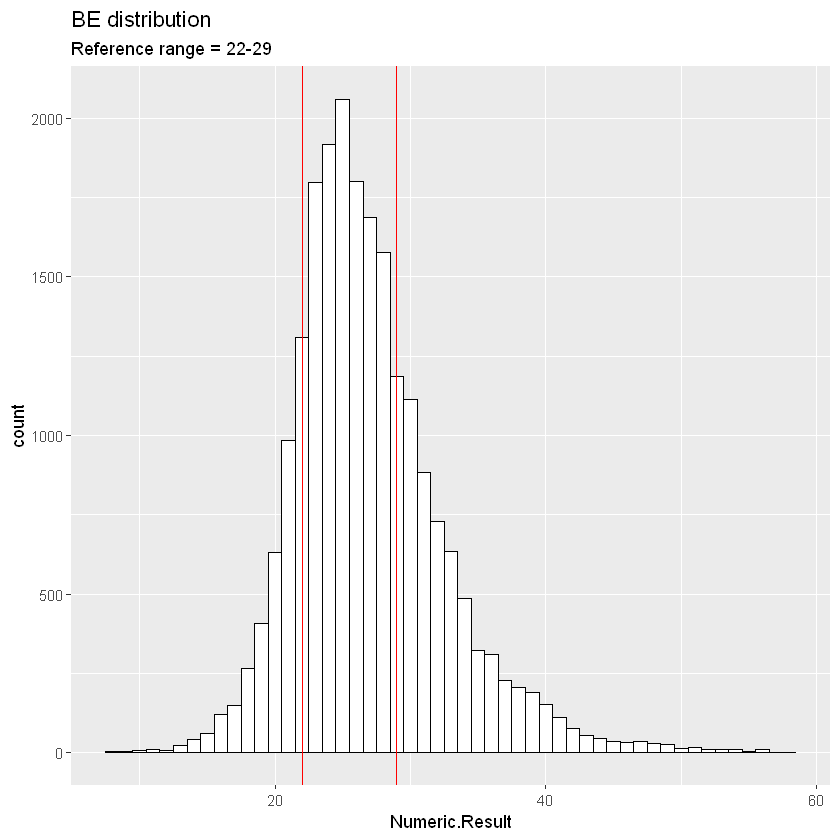

In [231]:
ggplot(data = BE_histogram, aes(x=Numeric.Result)) +
  ggtitle("BE distribution") +
  labs(subtitle="Reference range = 22-29") + 
  geom_histogram(binwidth=1, colour="black", fill="white") +
  geom_vline(xintercept=22,colour="red") +
  geom_vline(xintercept=29,colour="red")

### B-type natriuretic peptide

Simple threshold introduced to show clearer histogram

In [232]:
BNPHistogram <- subset(BNP, Numeric.Result < 5000)

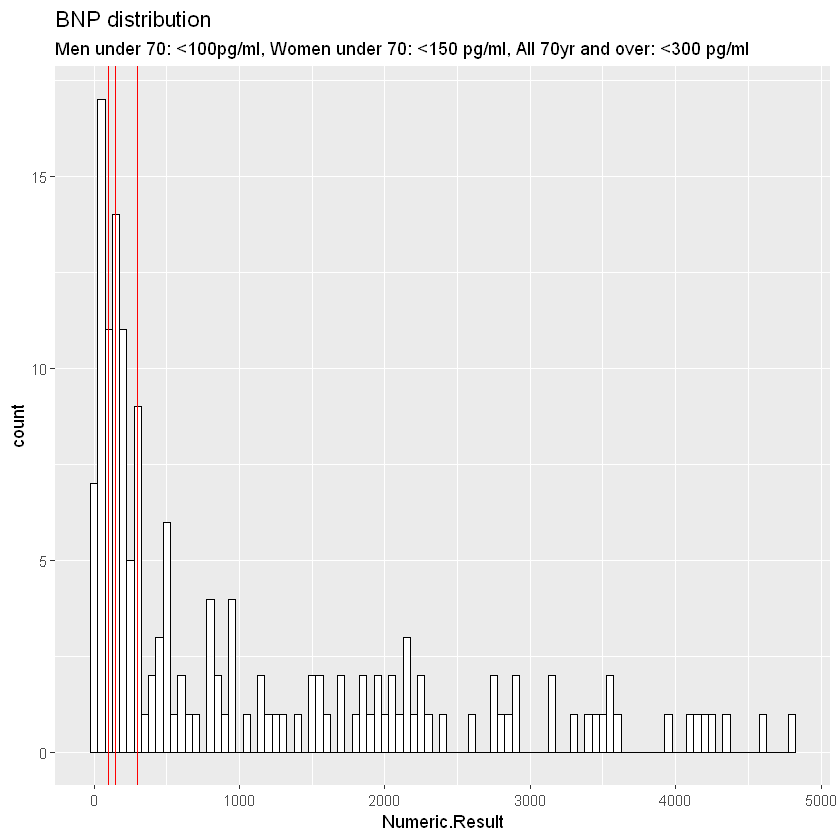

In [233]:
# Histograms against thresholds
ggplot(data = BNPHistogram, aes(x=Numeric.Result)) +
  ggtitle("BNP distribution") +
  labs(subtitle="Men under 70: <100pg/ml, Women under 70: <150 pg/ml, All 70yr and over: <300 pg/ml") + 
  geom_histogram(binwidth=50, colour="black", fill="white") +
  geom_vline(xintercept=100,colour="red") +
  geom_vline(xintercept=150,colour="red") + 
  geom_vline(xintercept=300,colour="red")

### APTT - Activated Partial Thromboplastin Time

In [234]:
ClotAPTTHistogram <- subset(ClotAPTTR, Numeric.Result < 75)

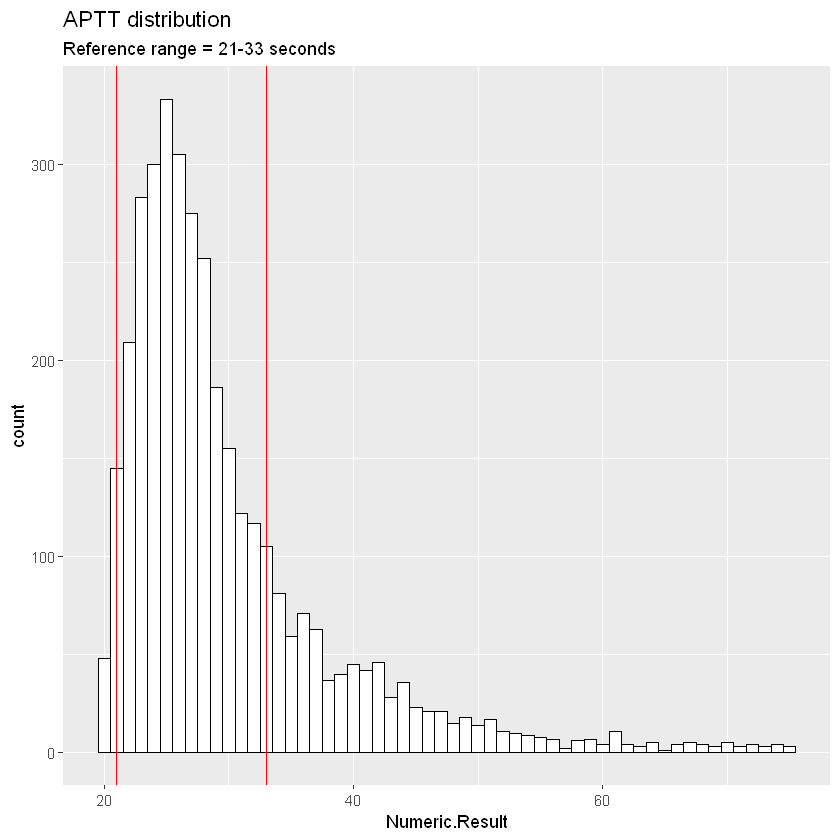

In [235]:
ggplot(data = ClotAPTTHistogram, aes(x=Numeric.Result)) +
  ggtitle("APTT distribution") +
  labs(subtitle="Reference range = 21-33 seconds") + 
  geom_histogram(binwidth=1, colour="black", fill="white") +
  geom_vline(xintercept=21,colour="red") +
  geom_vline(xintercept=33,colour="red")

### PT - Partial Thromboplastin

In [236]:
PT_Histogram <- subset(ClotPTR, Numeric.Result < 20)

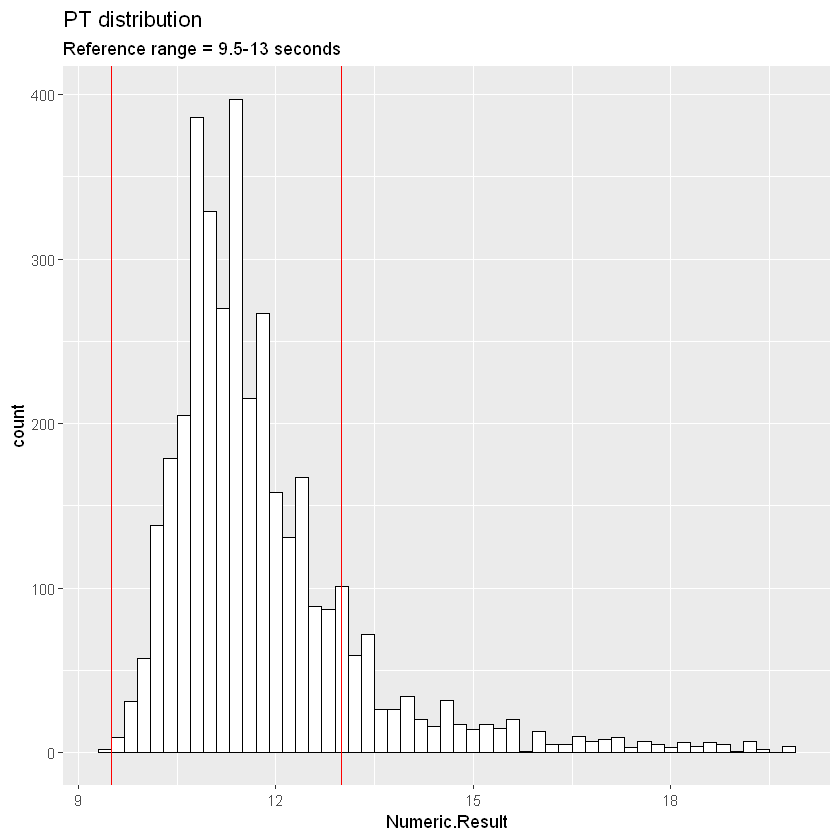

In [237]:
ggplot(data = PT_Histogram, aes(x=Numeric.Result)) +
  ggtitle("PT distribution") +
  labs(subtitle="Reference range = 9.5-13 seconds") + 
  geom_histogram(binwidth=0.2, colour="black", fill="white") +
  geom_vline(xintercept=9.5,colour="red") +
  geom_vline(xintercept=13,colour="red")

### CO2

Warning message:
"Removed 8 rows containing non-finite values (stat_bin)."

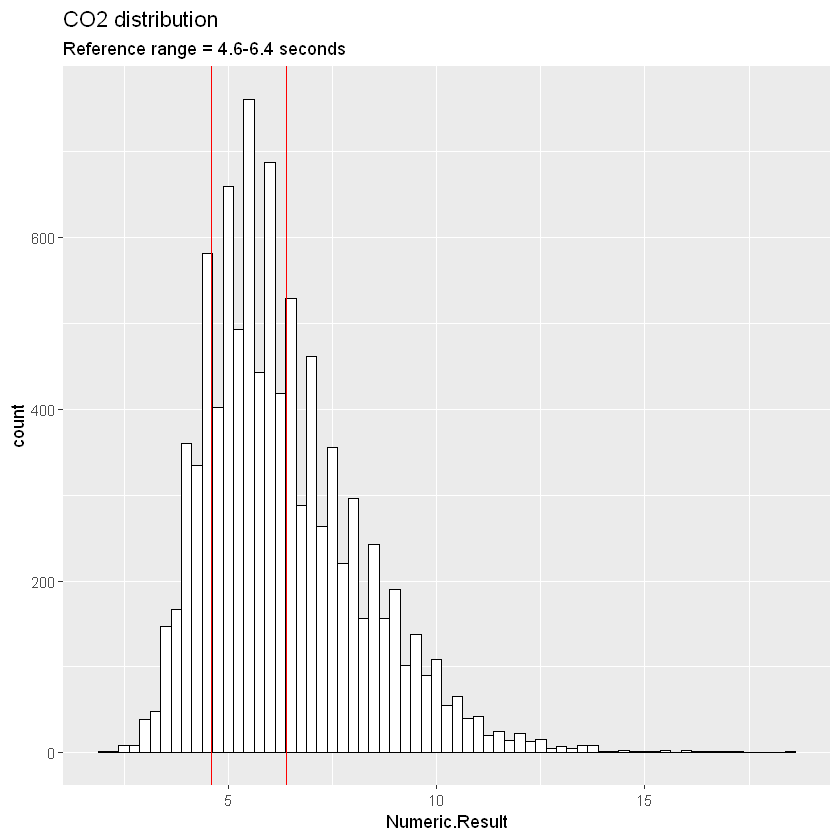

In [238]:
ggplot(data = CO2R, aes(x=Numeric.Result)) +
  ggtitle("CO2 distribution") +
  labs(subtitle="Reference range = 4.6-6.4 seconds") + 
  geom_histogram(binwidth=0.25, colour="black", fill="white") +
  geom_vline(xintercept=4.6,colour="red") +
  geom_vline(xintercept=6.4,colour="red")

### O2

In [239]:
O2_histogram <- subset(O2R, Numeric.Result < 30)

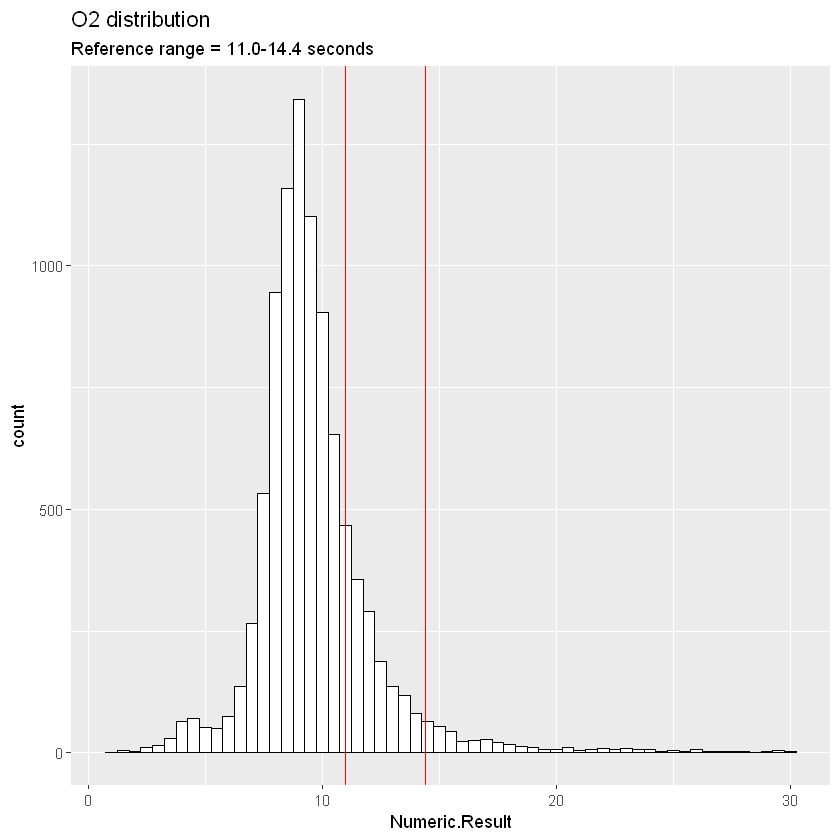

In [240]:
ggplot(data = O2_histogram, aes(x=Numeric.Result)) +
  ggtitle("O2 distribution") +
  labs(subtitle="Reference range = 11.0-14.4 seconds") + 
  geom_histogram(binwidth=0.5, colour="black", fill="white") +
  geom_vline(xintercept=11,colour="red") +
  geom_vline(xintercept=14.4,colour="red")

### C Reactive Protein

In [241]:
CRP_histogram <- subset(CRP, Numeric.Result < 400)

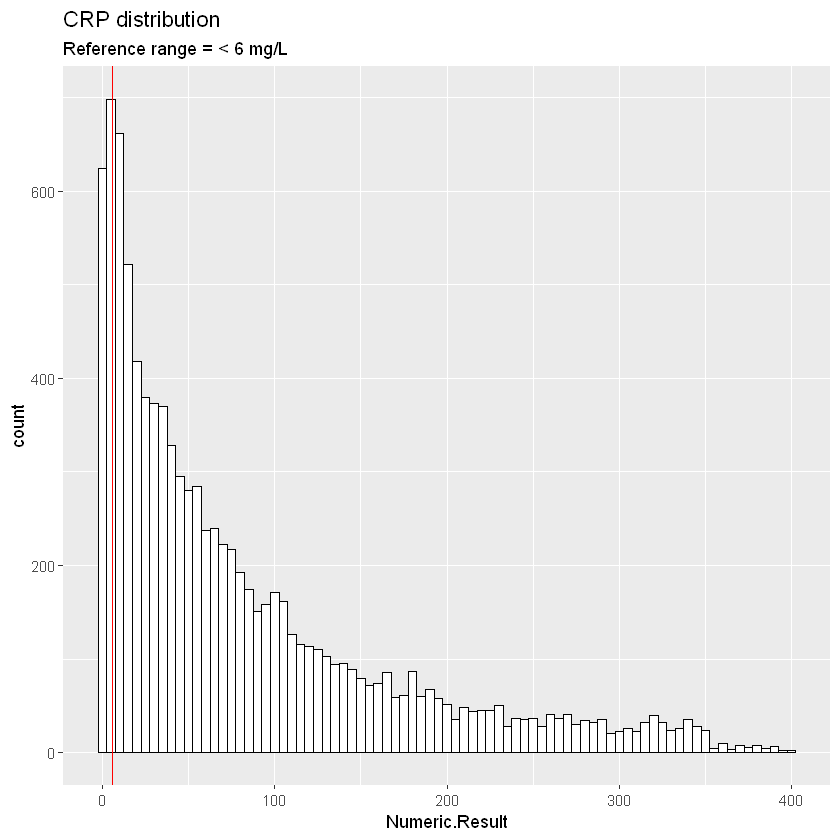

In [242]:
ggplot(data = CRP_histogram, aes(x=Numeric.Result)) +
  ggtitle("CRP distribution") +
  labs(subtitle="Reference range = < 6 mg/L") + 
  geom_histogram(binwidth=5, colour="black", fill="white") +
  geom_vline(xintercept=6,colour="red")

### D-Dimer

In [243]:
DDM_histogram <- subset(DDM, Numeric.Result < 20000)

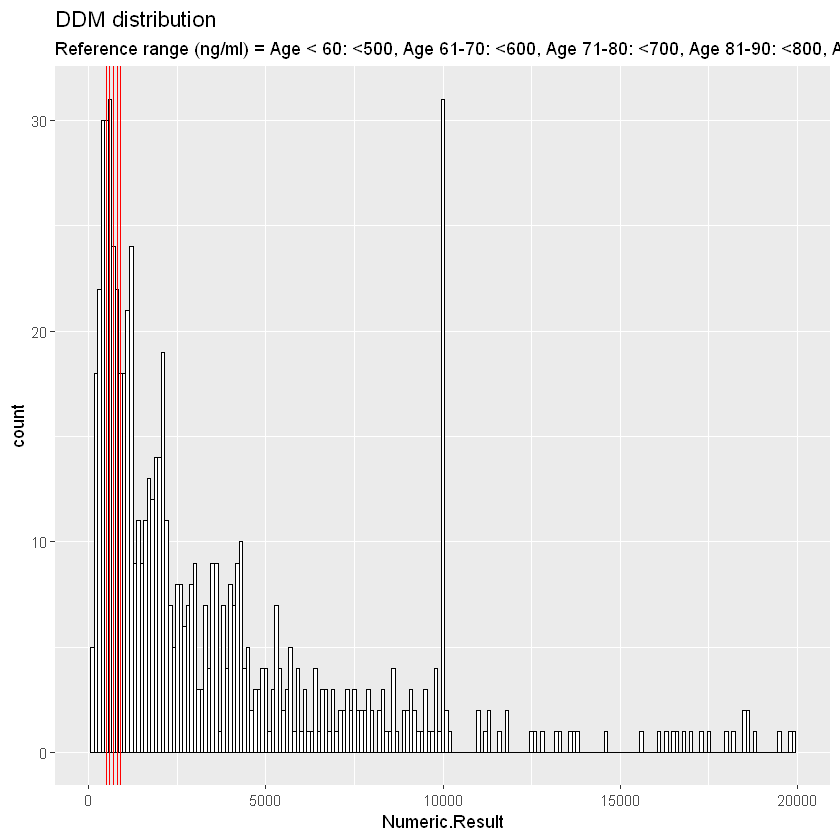

In [244]:
ggplot(data = DDM_histogram, aes(x=Numeric.Result)) +
  ggtitle("DDM distribution") +
  labs(subtitle="Reference range (ng/ml) = Age < 60: <500, Age 61-70: <600, Age 71-80: <700, Age 81-90: <800, Age > 90: <900") + 
  geom_histogram(binwidth=100, colour="black", fill="white") +
  geom_vline(xintercept=500,colour="red") + 
  geom_vline(xintercept=600,colour="red") + 
  geom_vline(xintercept=700,colour="red") + 
  geom_vline(xintercept=800,colour="red") + 
  geom_vline(xintercept=900,colour="red") 

### eGFR - Estimated Glomerular Filtration Rate

----------**Note that values over 90 were listed as "NA", this needs fixing**---------

Warning message:
"Removed 2666 rows containing non-finite values (stat_bin)."

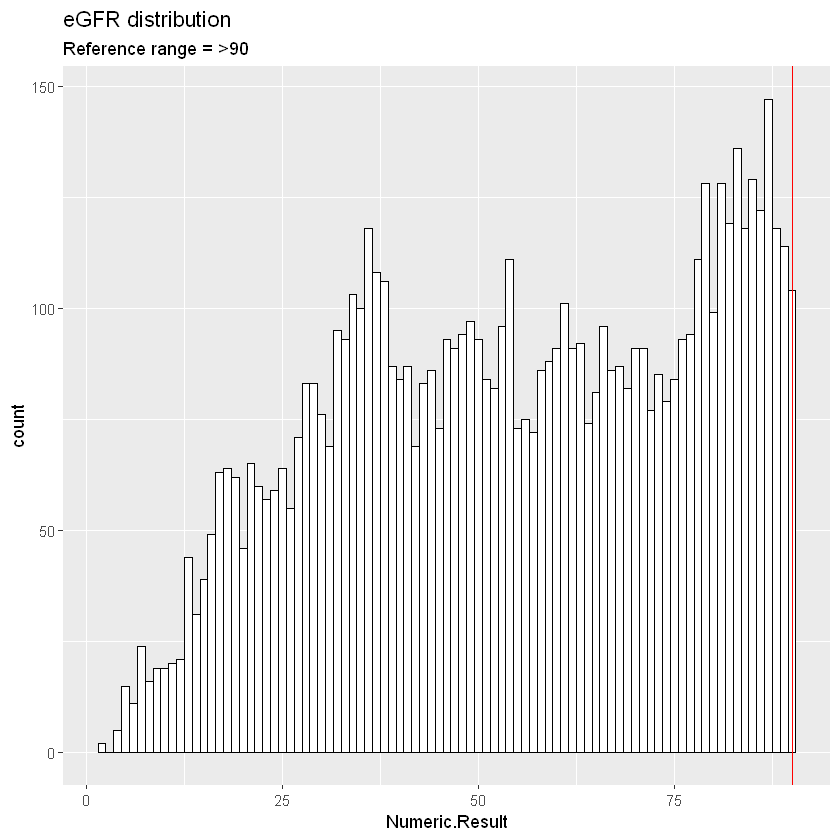

In [245]:
ggplot(data = eGFR, aes(x=Numeric.Result)) +
  ggtitle("eGFR distribution") +
  labs(subtitle="Reference range = >90") + 
  geom_histogram(binwidth=1, colour="black", fill="white") +
  geom_vline(xintercept=90,colour="red")

### Lymphocytes

In [246]:
Lymph_histogram <- subset(FBCLymphR, Numeric.Result < 10)

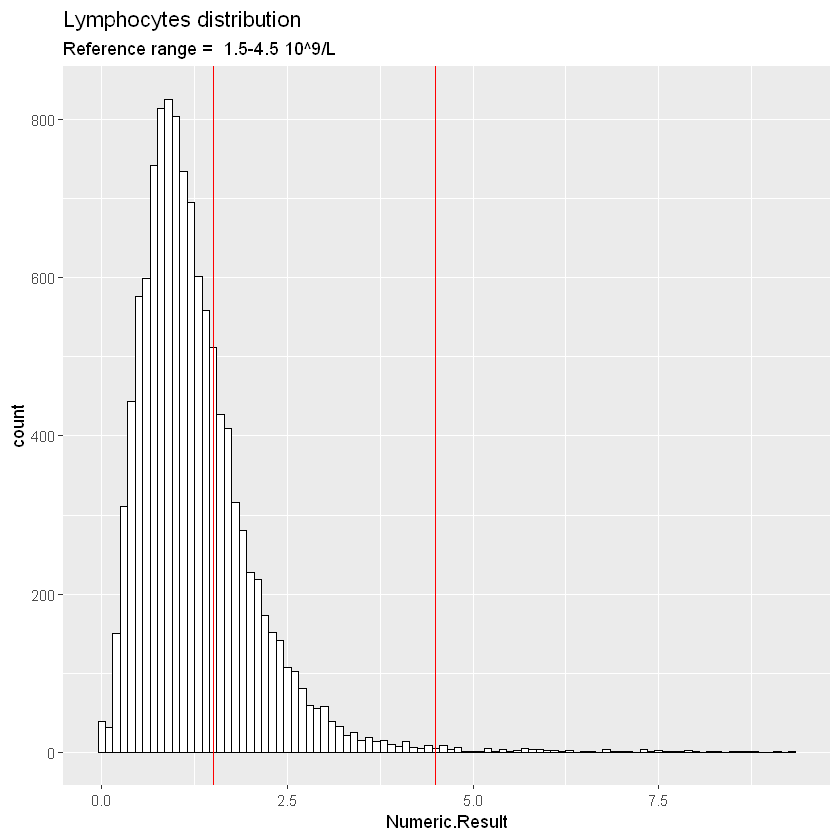

In [247]:
ggplot(data = Lymph_histogram, aes(x=Numeric.Result)) +
  ggtitle("Lymphocytes distribution") +
  labs(subtitle="Reference range =  1.5-4.5 10^9/L") + 
  geom_histogram(binwidth=0.1, colour="black", fill="white") +
  geom_vline(xintercept=1.5,colour="red") + 
  geom_vline(xintercept=4.5,colour="red")

### Neutrophils

In [248]:
Neutr_histogram <- subset(FBCNeutrR, Numeric.Result < 30)

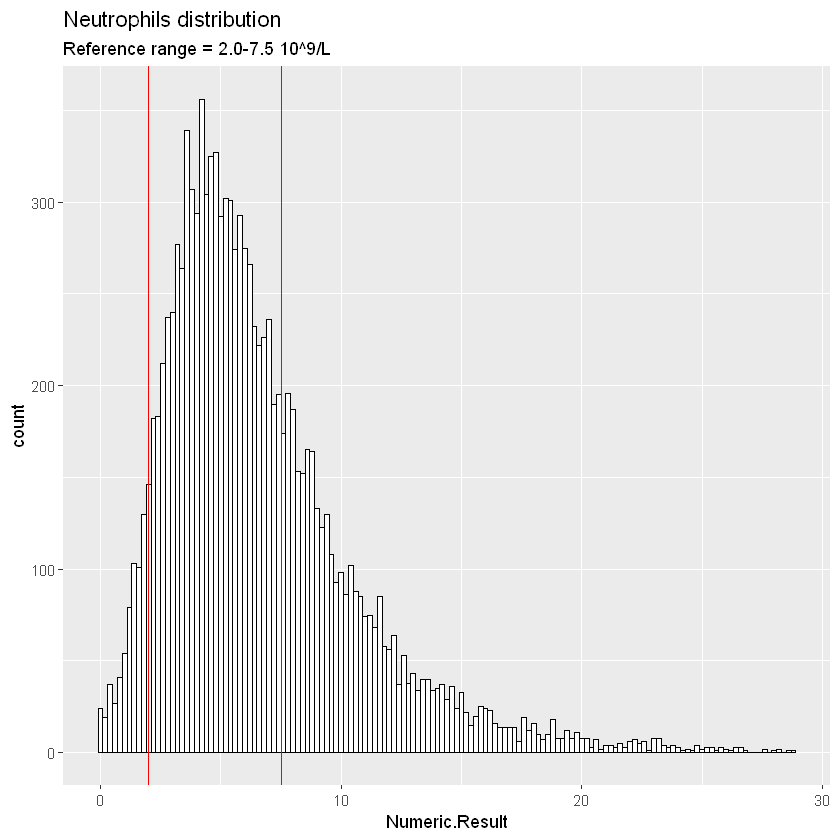

In [249]:
ggplot(data = Neutr_histogram, aes(x=Numeric.Result)) +
  ggtitle("Neutrophils distribution") +
  labs(subtitle="Reference range = 2.0-7.5 10^9/L") + 
  geom_histogram(binwidth=0.2, colour="black", fill="white") +
  geom_vline(xintercept=2.0,colour="red") + 
  geom_vline(xintercept=7.5,colour="red")

### Neutrophils to Lymphocytes Ratio

In [250]:
NLR_histogram <- subset(FBCNLRR, Numeric.Result < 40)

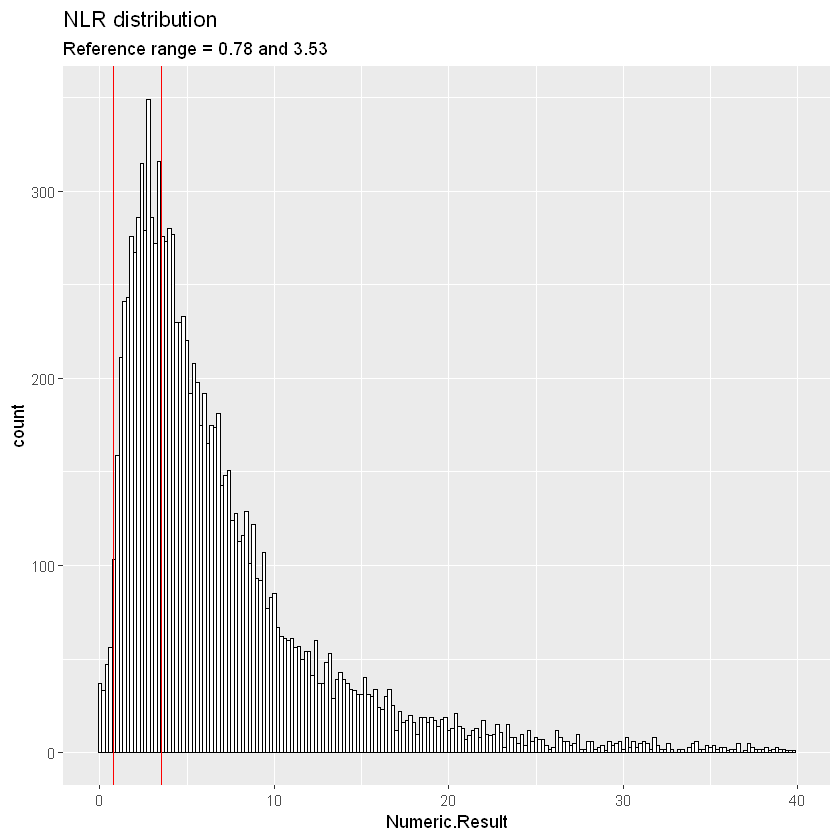

In [251]:
ggplot(data = NLR_histogram, aes(x=Numeric.Result)) +
  ggtitle("NLR distribution") +
  labs(subtitle="Reference range = 0.78 and 3.53") + 
  geom_histogram(binwidth=0.2, colour="black", fill="white") +
  geom_vline(xintercept=0.78,colour="red") + 
  geom_vline(xintercept=3.53,colour="red")

### White Cell Count

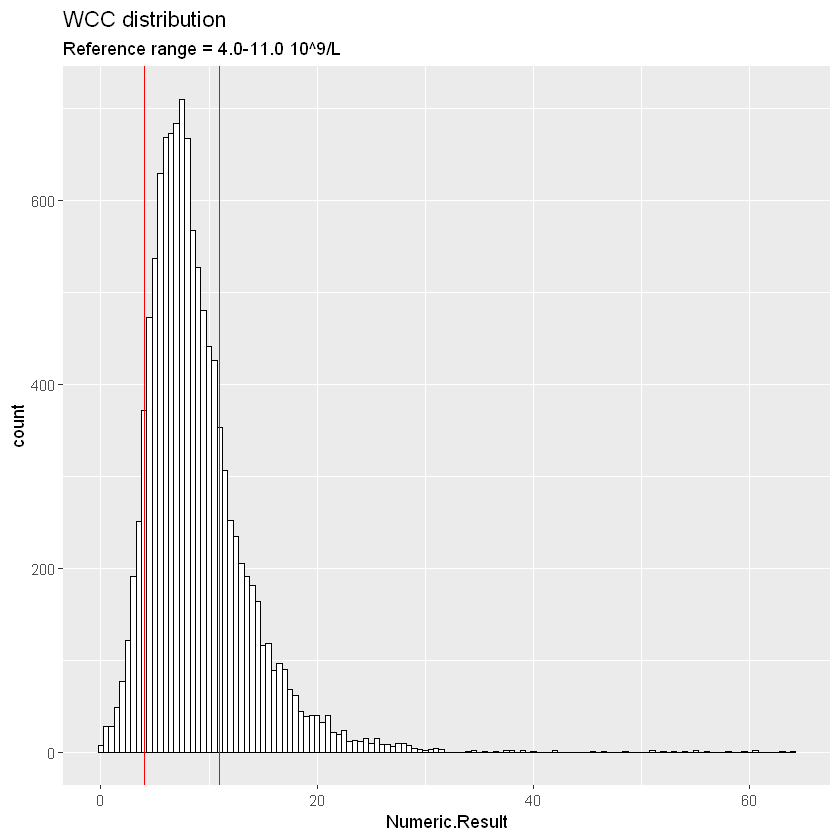

In [252]:
ggplot(data = FBCWCCR, aes(x=Numeric.Result)) +
  ggtitle("WCC distribution") +
  labs(subtitle="Reference range = 4.0-11.0 10^9/L") + 
  geom_histogram(binwidth=0.5, colour="black", fill="white") +
  geom_vline(xintercept=4.0,colour="red") + 
  geom_vline(xintercept=11.0,colour="red")

### Ferritin 

In [253]:
FER_histogram <- subset(FER, Numeric.Result < 2500)

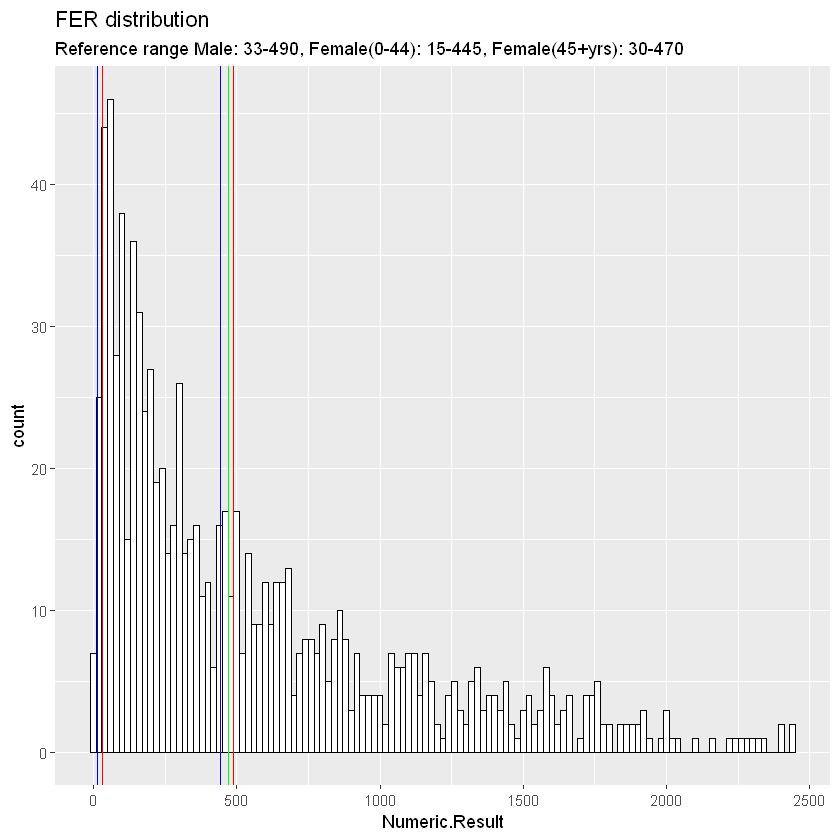

In [254]:
ggplot(data = FER_histogram, aes(x=Numeric.Result)) +
  ggtitle("FER distribution") +
  labs(subtitle="Reference range Male: 33-490, Female(0-44): 15-445, Female(45+yrs): 30-470") + 
  geom_histogram(binwidth=20, colour="black", fill="white") +
  geom_vline(xintercept=15,colour="blue") + 
  geom_vline(xintercept=33,colour="red") + 
  geom_vline(xintercept=445,colour="blue") + 
  geom_vline(xintercept=470,colour="green") + 
  geom_vline(xintercept=490,colour="red")

### Fibrinogen

In [255]:
fib_histogram <- subset(fib, Numeric.Result > 0)

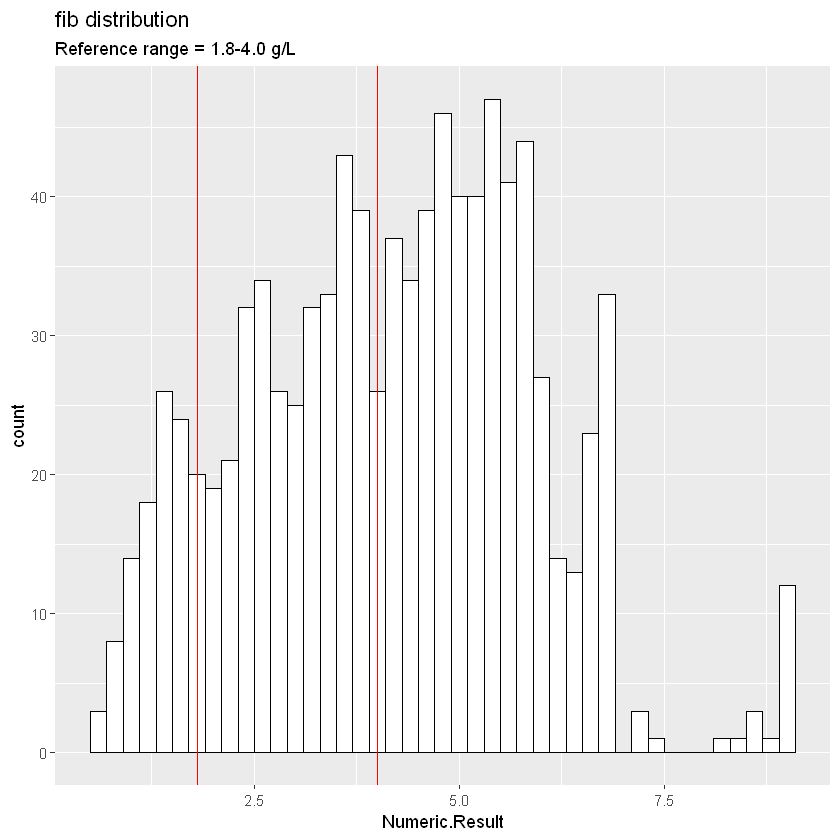

In [256]:
ggplot(data = fib_histogram, aes(x=Numeric.Result)) +
  ggtitle("fib distribution") +
  labs(subtitle="Reference range = 1.8-4.0 g/L") + 
  geom_histogram(binwidth=0.2, colour="black", fill="white") +
  geom_vline(xintercept=1.8,colour="red") + 
  geom_vline(xintercept=4.0,colour="red")

### Glucose

In [257]:
glucose_histogram <- subset(Glucose, Numeric.Result < 25)

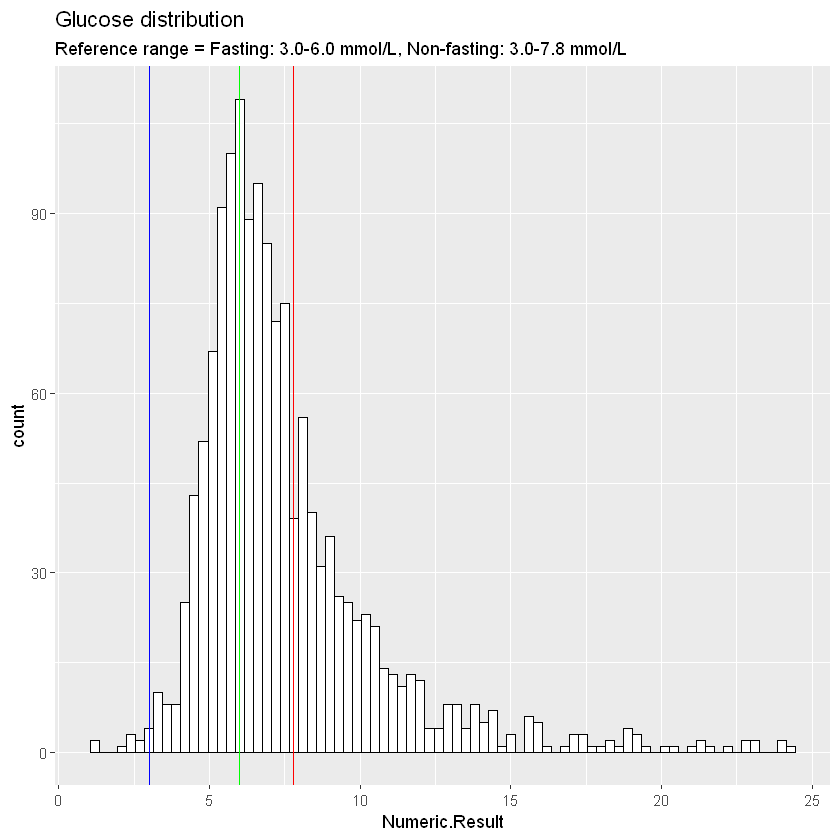

In [258]:
ggplot(data = glucose_histogram, aes(x=Numeric.Result)) +
  ggtitle("Glucose distribution") +
  labs(subtitle="Reference range = Fasting: 3.0-6.0 mmol/L, Non-fasting: 3.0-7.8 mmol/L") + 
  geom_histogram(binwidth=0.3, colour="black", fill="white") +
  geom_vline(xintercept=3,colour="blue") + 
  geom_vline(xintercept=6,colour="green") + 
  geom_vline(xintercept=7.8,colour="red")

### Hemoglobin

Warning message:
"Removed 159 rows containing non-finite values (stat_bin)."

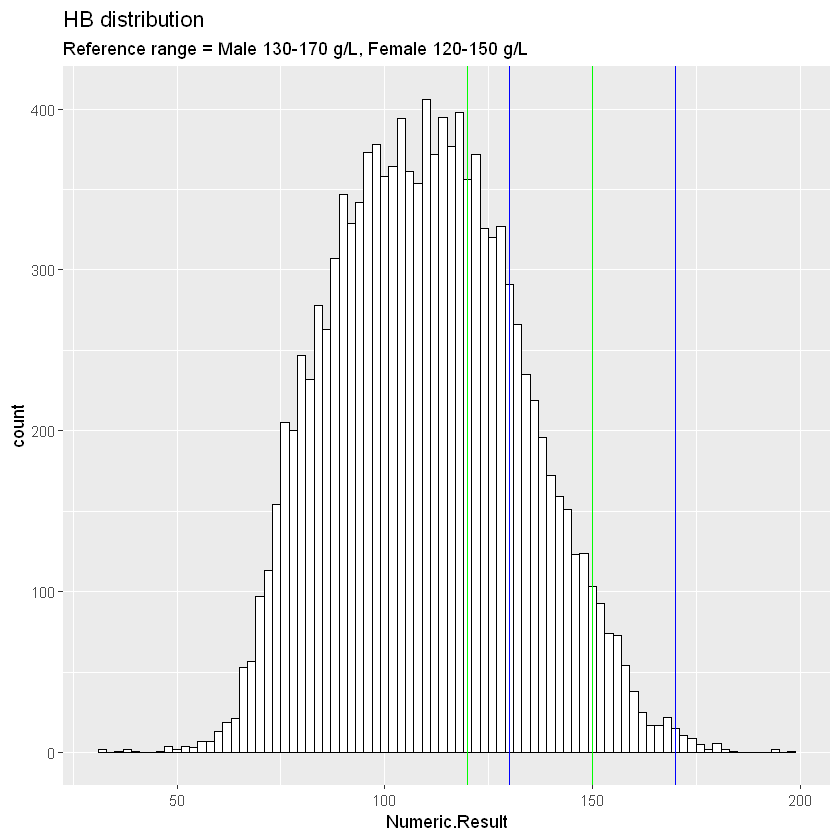

In [259]:
ggplot(data = HB, aes(x=Numeric.Result)) +
  ggtitle("HB distribution") +
  labs(subtitle="Reference range = Male 130-170 g/L, Female 120-150 g/L") + 
  geom_histogram(binwidth=2, colour="black", fill="white") +
  geom_vline(xintercept=120,colour="green") + 
  geom_vline(xintercept=130,colour="blue") + 
  geom_vline(xintercept=150,colour="green") + 
  geom_vline(xintercept=170,colour="blue")

### HBA1c - glycated haemoglobin

Warning message:
"Removed 2 rows containing non-finite values (stat_bin)."

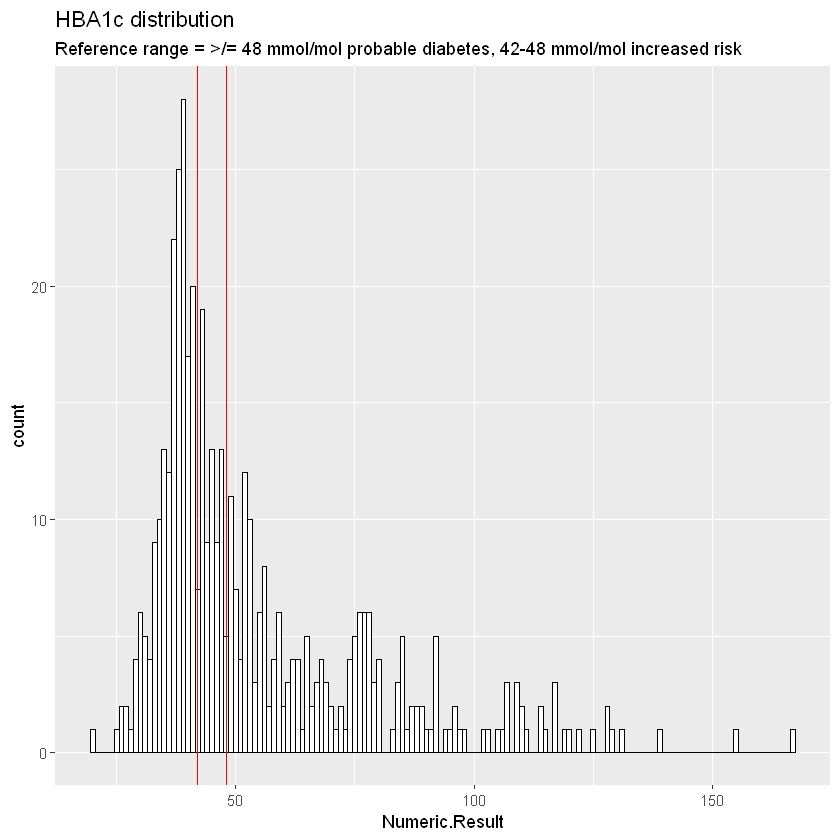

In [260]:
ggplot(data = HBA1c, aes(x=Numeric.Result)) +
  ggtitle("HBA1c distribution") +
  labs(subtitle="Reference range = >/= 48 mmol/mol probable diabetes, 42-48 mmol/mol increased risk") + 
  geom_histogram(binwidth=1, colour="black", fill="white") +
  geom_vline(xintercept=42,colour="red") + 
  geom_vline(xintercept=48,colour="red")


### Lactate dehydrogenase

In [261]:
LDH_histogram <- subset(LDH, Numeric.Result < 2000)

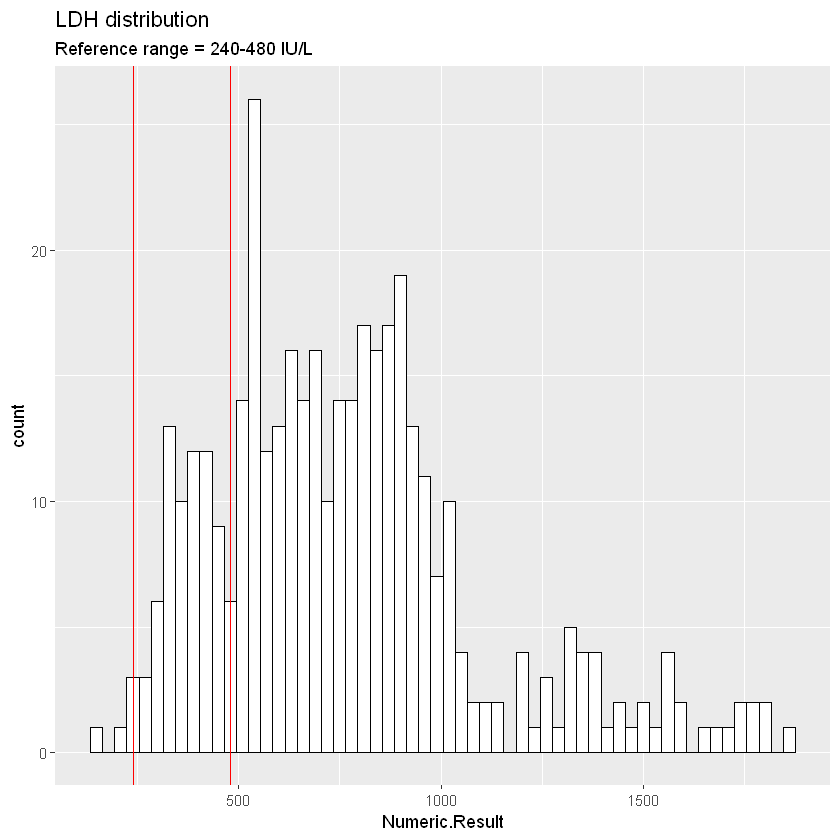

In [262]:
ggplot(data = LDH_histogram, aes(x=Numeric.Result)) +
  ggtitle("LDH distribution") +
  labs(subtitle="Reference range = 240-480 IU/L") + 
  geom_histogram(binwidth=30, colour="black", fill="white") +
  geom_vline(xintercept=240,colour="red") + 
  geom_vline(xintercept=480,colour="red")

### Procalcitonin

In [263]:
PCT_histogram <- subset(PCT, Numeric.Result < 7.5)

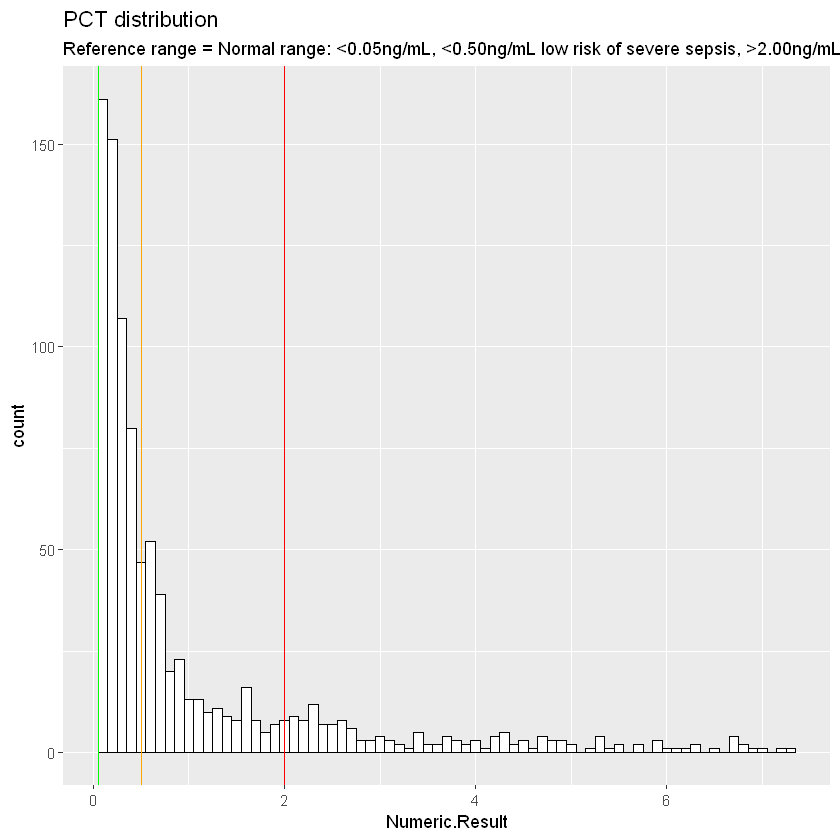

In [264]:
ggplot(data = PCT_histogram, aes(x=Numeric.Result)) +
  ggtitle("PCT distribution") +
  labs(subtitle="Reference range = Normal range: <0.05ng/mL, <0.50ng/mL low risk of severe sepsis, >2.00ng/mL high risk severe sepsis") + 
  geom_histogram(binwidth=0.1, colour="black", fill="white") +
  geom_vline(xintercept=0.05,colour="green") + 
  geom_vline(xintercept=0.50,colour="orange") + 
  geom_vline(xintercept=2.0,colour="red") 

### Platelets

Warning message:
"Removed 185 rows containing non-finite values (stat_bin)."

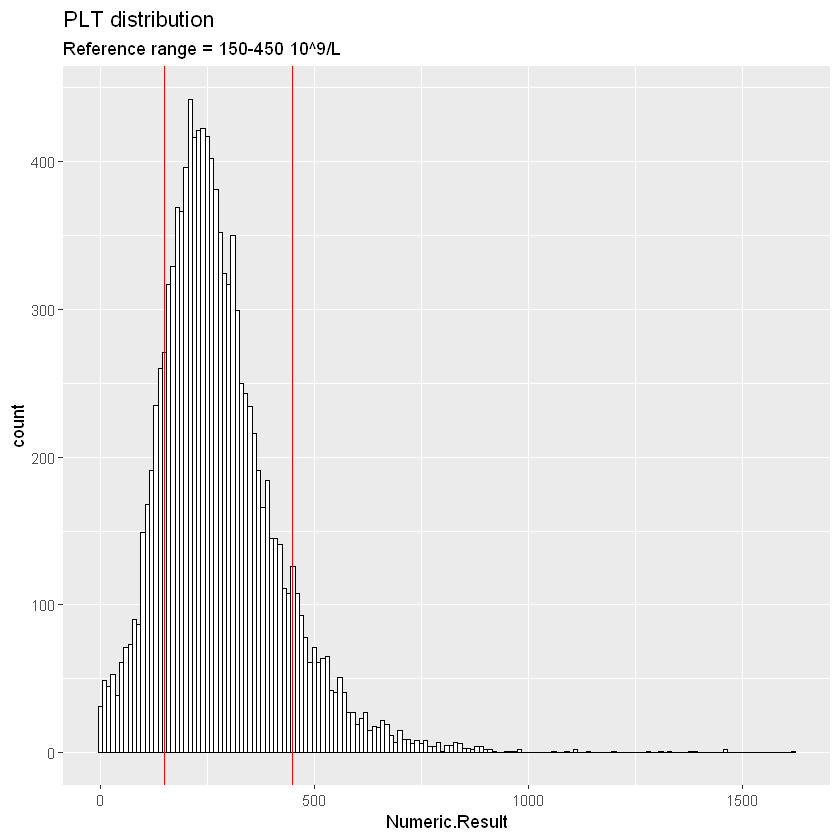

In [265]:
ggplot(data = PLT, aes(x=Numeric.Result)) +
  ggtitle("PLT distribution") +
  labs(subtitle="Reference range = 150-450 10^9/L") + 
  geom_histogram(binwidth=10, colour="black", fill="white") +
  geom_vline(xintercept=150,colour="red") + 
  geom_vline(xintercept=450,colour="red") 

### Blood Lactate

In [266]:
poctLAC_histogram <- subset(poctLACR, Numeric.Result < 6)

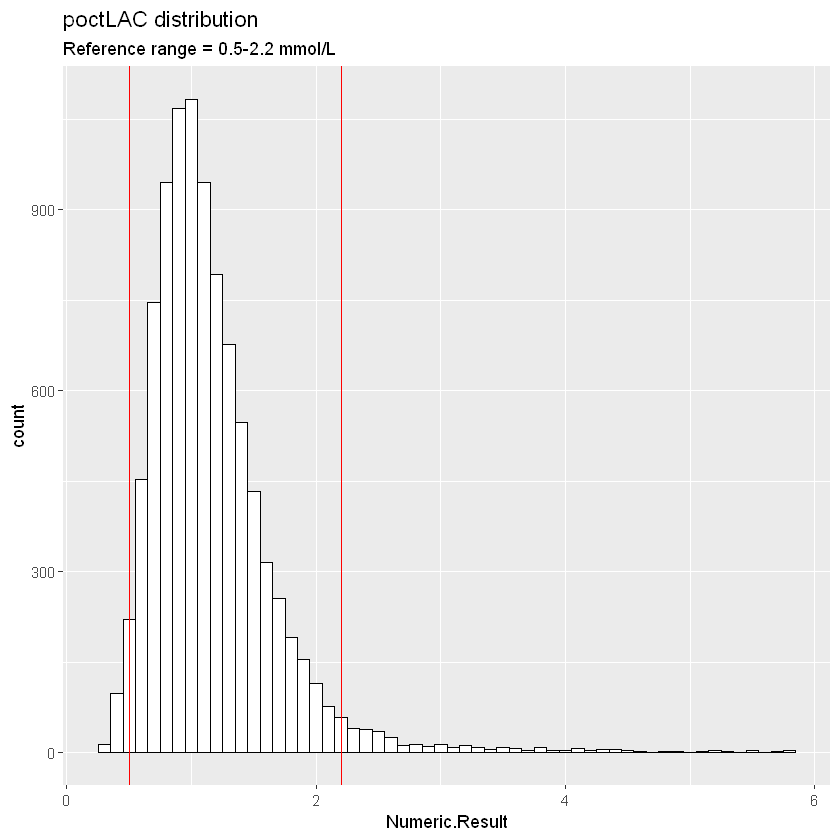

In [267]:
ggplot(data = poctLAC_histogram, aes(x=Numeric.Result)) +
  ggtitle("poctLAC distribution") +
  labs(subtitle="Reference range = 0.5-2.2 mmol/L") + 
  geom_histogram(binwidth=0.1, colour="black", fill="white") +
  geom_vline(xintercept=0.5,colour="red") + 
  geom_vline(xintercept=2.2,colour="red") 

### Blood pH

Warning message:
"Removed 20 rows containing non-finite values (stat_bin)."

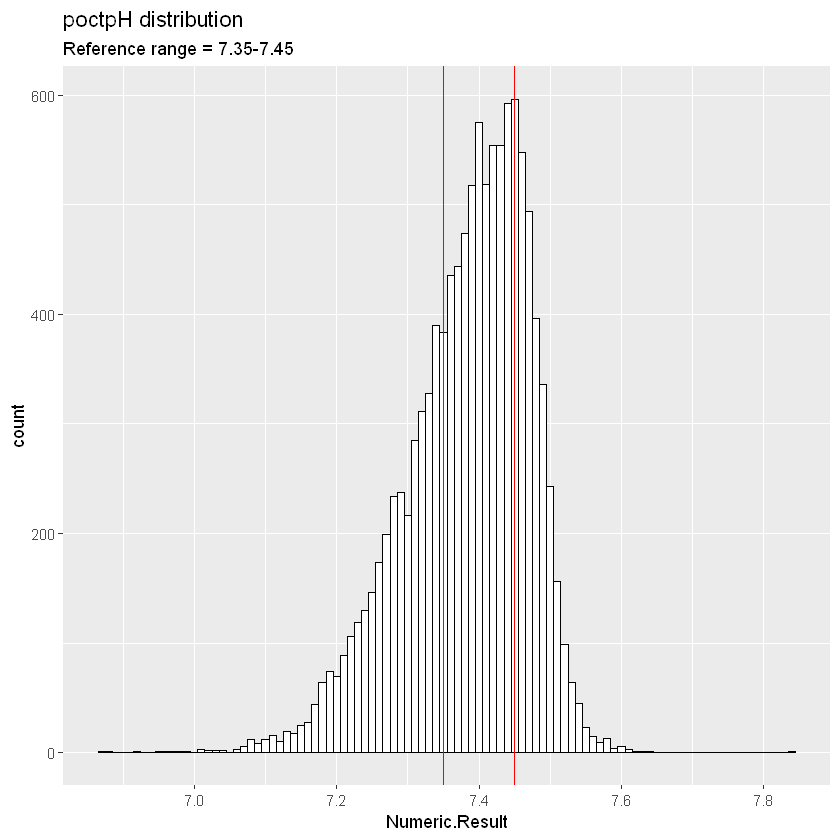

In [268]:
ggplot(data = poctpHR, aes(x=Numeric.Result)) +
  ggtitle("poctpH distribution") +
  labs(subtitle="Reference range = 7.35-7.45") + 
  geom_histogram(binwidth=0.01, colour="black", fill="white") +
  geom_vline(xintercept=7.35,colour="red") + 
  geom_vline(xintercept=7.45,colour="red")

### Triglycerides

In [269]:
trig_histogram <- subset(trig, Numeric.Result < 6)

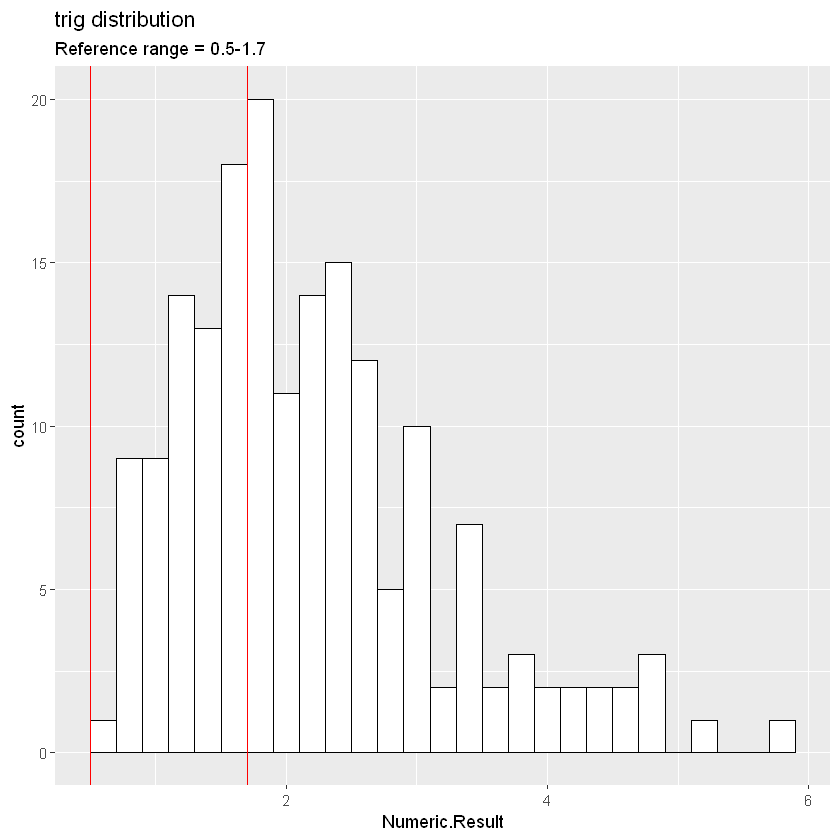

In [270]:
ggplot(data = trig_histogram, aes(x=Numeric.Result)) +
  ggtitle("trig distribution") +
  labs(subtitle="Reference range = 0.5-1.7") + 
  geom_histogram(binwidth=0.2, colour="black", fill="white") +
  geom_vline(xintercept=0.5,colour="red") + 
  geom_vline(xintercept=1.7,colour="red")

### Troponin

In [271]:
trop_histogram <- subset(trop, Numeric.Result < 350)

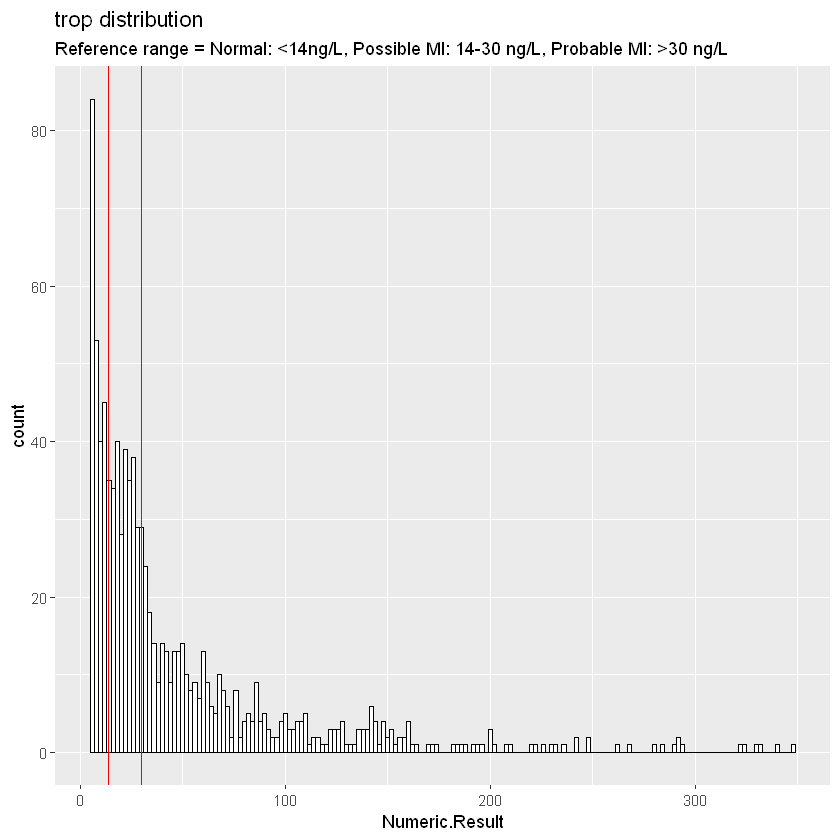

In [272]:
ggplot(data = trop_histogram, aes(x=Numeric.Result)) +
  ggtitle("trop distribution") +
  labs(subtitle="Reference range = Normal: <14ng/L, Possible MI: 14-30 ng/L, Probable MI: >30 ng/L") + 
  geom_histogram(binwidth=2, colour="black", fill="white") +
  geom_vline(xintercept=14,colour="red") + 
  geom_vline(xintercept=30,colour="red")

## Individual Patient Visualisation
To show individual patient data, please use this function, of the form 

    show_patient_info(patientID)

In [273]:
show_patient_info <- function(patientID) {
  val_outcome = subset(dem, ID==patientID)[1,]
  gender = val_outcome$Gender
  age = val_outcome$Age
  date = (total %>% filter(ID==patientID))[1,]$date
  p <- ( ggplot() + 
           ggtitle(paste("Patient",patientID,"summary")) + 
           labs(subtitle=paste("Gender:",val_outcome$Gender,"Age",val_outcome$Age)) +
           geom_tile(data=total %>% filter(ID==patientID), mapping=aes(date, Measure, fill= Numeric.Result)) + 
           scale_fill_viridis_b()+
           scale_y_discrete(drop=FALSE)
  )
  # Plot Covid Positive test
  if(length((CovidCT %>% filter(CovidCT$ID==patientID))$date) > 0){
    if(!is.null((CovidCT %>% filter(CovidCT$ID==patientID))$date) & !is.na((CovidCT %>% filter(CovidCT$ID==patientID))$date)){
      positiveDate = (CovidCT %>% filter(CovidCT$ID==patientID))[1,]$date
      p = p + geom_text(data= (CovidCT %>% filter(CovidCT$ID==patientID))[1,], mapping=aes(x=date,y=1,label="Positive",colour="orange")) +
        geom_vline(data= (CovidCT %>% filter(CovidCT$ID==patientID))[1,], mapping=aes(xintercept = date, colour="red"))
    }
  }
  # Plot hospital admission
  if(length((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$admissionDate) > 0){
    if(!is.null((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$admissionDate) & !is.na((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$admissionDate)){
      for(val2 in 1:length(totalOutcomes %>% filter(totalOutcomes$ID==patientID))){
        admissionDate = (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,]$admissionDate
        p = p + geom_point(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,], mapping=aes(x=admissionDate,y=0)) +
          geom_text(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,], mapping=aes(x=admissionDate,y=2,label="Admission",colour="orange"))
        p = p + geom_vline(xintercept = admissionDate, colour="blue")
      }
    }
  }
  # Plot ICU admission
  if(length((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$ITU_Start) > 0){
    if(!is.null((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$ITU_Start) & !is.na((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$ITU_Start)){
      for(val2 in 1:length(totalOutcomes %>% filter(totalOutcomes$ID==patientID))){
        ITU_Start = (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,]$ITU_Start
        p = p + geom_point(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,], mapping=aes(x=ITU_Start,y=0)) +
          geom_text(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,], mapping=aes(x=ITU_Start,y=3,label="ICU Start",colour="orange"))
        p = p + geom_vline(xintercept = ITU_Start, colour="blue")
      }
    }
  }
  # Plot ICU discharge
  if(length((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$ITU_End) > 0){
    if(!is.null((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$ITU_End) & !is.na((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$ITU_End)){
      for(val2 in 1:length(totalOutcomes %>% filter(totalOutcomes$ID==patientID))){
        ITU_End = (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,]$ITU_End
        p = p + geom_point(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,], mapping=aes(x=ITU_End,y=0)) +
          geom_text(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,], mapping=aes(x=ITU_End,y=4,label="ICU End",colour="orange"))
        p = p + geom_vline(xintercept = ITU_End, colour="blue")
      }
    }
  }
  # Plot date of death
  if(length((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$deathDate) > 0){
    if(!is.na((totalOutcomes %>% filter(totalOutcomes$ID==patientID))$deathDate)){
      deathDate = (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[1,]$deathDate
      p = p + geom_point(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[1,], mapping=aes(x=deathDate,y=0)) + 
        geom_text(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[1,], mapping=aes(x=deathDate,y=5,label="Death",colour="orange"))
      p = p + geom_vline(xintercept = deathDate, colour="red")
    }else{
      for(val2 in 1:length(totalOutcomes %>% filter(totalOutcomes$ID==patientID))){
        dischargeDate = (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,]$dischargeDate
        # Plot discharge
        p = p + geom_point(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,], mapping=aes(x=dischargeDate,y=0)) + 
          geom_text(data= (totalOutcomes %>% filter(totalOutcomes$ID==patientID))[val2,], mapping=aes(x=dischargeDate,y=6,label="Discharged",colour="orange"))
        p = p + geom_vline(xintercept = dischargeDate, colour="green")
      }
    }
  }
  #fig <- ggplotly(p)
  print(p)
}


### Example individual patient visualisations:
#### Patient 279 - Example of ICU patient

,ID,admissionDate,dischargeDate,ITU_Start,ITU_End,deathDate
372,279,2020-04-01,2020-06-15,2020-04-02,2020-05-14,NA


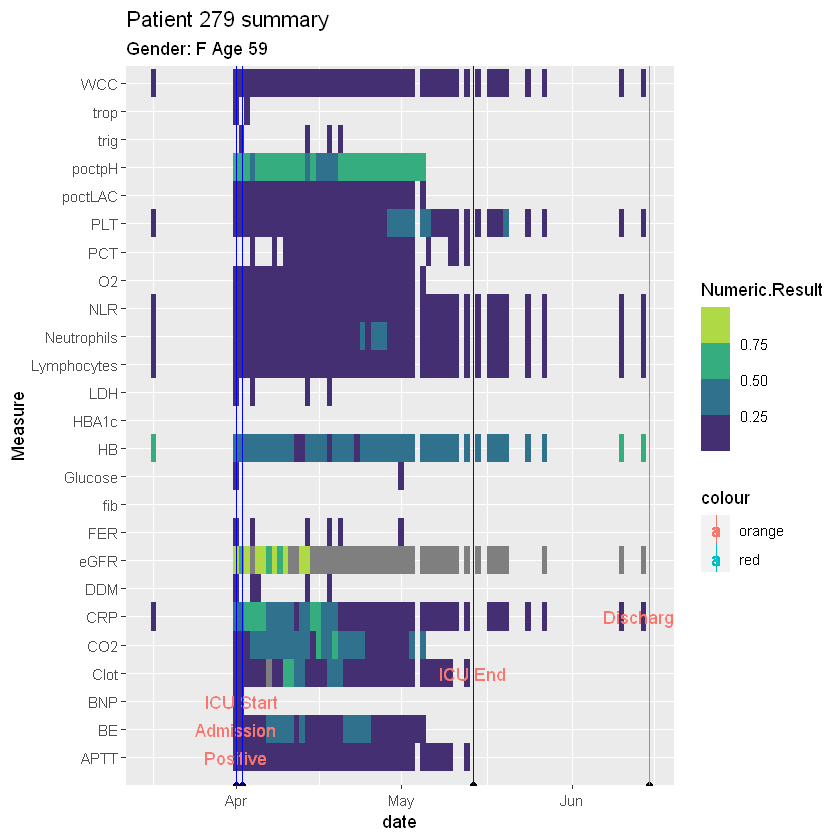

In [274]:
suppressWarnings(show_patient_info(279))
totalOutcomes[totalOutcomes$ID==279,]

#### Patient 80 - Example of death

,ID,admissionDate,dischargeDate,ITU_Start,ITU_End,deathDate
29,829,2020-05-09,2020-05-15,NA,NA,2020-05-15


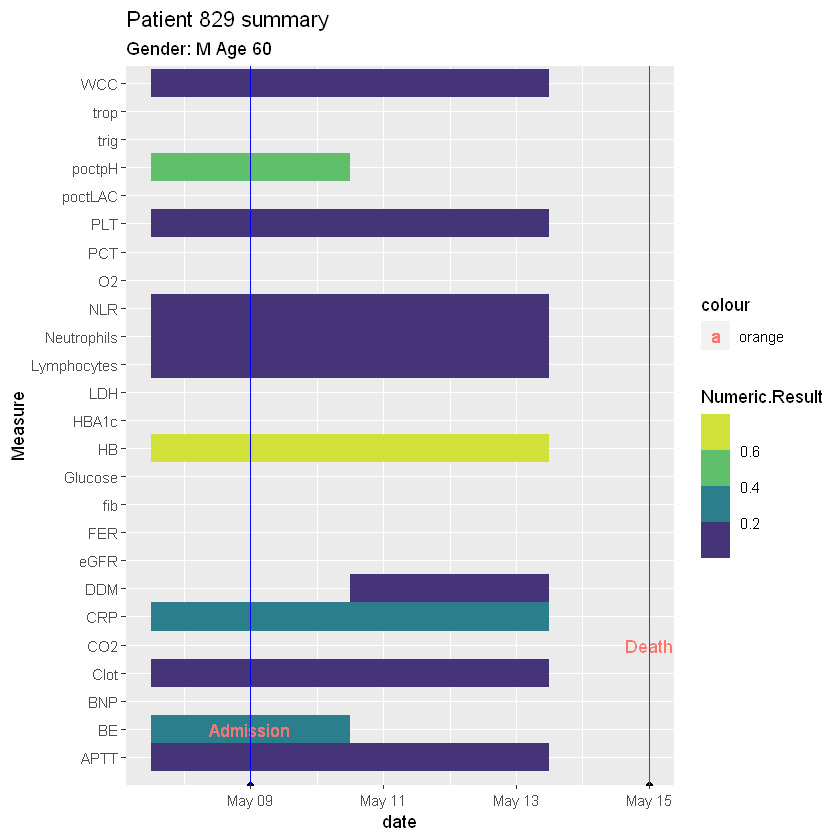

In [275]:
suppressWarnings(show_patient_info(829))
totalOutcomes[totalOutcomes$ID==829,]